In [1]:
%run ../../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
from common.class_helpers import do_plot_conf_mat

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

config_ipython()
setup_matplotlib()
set_css_style()

# Performance Metrics in Classification

## Possible outcomes of a classification task and the confusion matrix

If we are in a binary classification problem where the two classes are $1$ (call it positive) and $0$ (call it negative), our model can spit out either of them, but chances are some points will be classified wrongly. This leaves us with 4 possible situations in terms of how the points get classified based on what they actually are: 

* $TP$: True Positives, those points which are classified as $1$ and are actually $1$;
* $TN$: True Negatives, those points which are classified as $0$ and are actually $0$;
* $FP$: False Positives, those points which are classified as $1$ but are actually $0$;
* $FN$: False Negatives, those points which are classified as $0$ but are actually $1$

<img src="../../imgs/metrics-class.jpg" align="left" width="400" style="margin:20px 50px"/>

A useful graphic representation of the categories above is given in the figure here. 

The sum of counts in each of the categories, which is represented by the total area of the picture, equals the total of data points classified. The area of the ellipse, which is given by $TP + FP$ (abuse of notation: we're using the symbols above to mean the counts of the categories here!), will give the total of points classified as positive; the area of the green parts, equalling $TP + FN$ is the total of points which are actually positives; the area of the red parts, equalling $FP + TN$, is instead the total of points which are actually negatives. 

These categories and the terminology we set here will be used in the following to define the metrics we can use to assess the performance of a classifier. 

Note that we have specifically and for the sake of simplicity referred to the case of a binary classifier, but this framework is extensible to a generic multi-class classification with little work: you'd just have to consider that for each of the classes, you'll have points classified correctly and points classified as belonging to another class, so there will be counts of wrongly classified points in each class. We'll expand on this soon.

### The confusion matrix

<img src="../../imgs/confusion-matrix.jpg" align="left" width="400" style="margin:0px 50px"/>

Also known sometimes as *contingency table* or *error matrix*, it is a good tool to have a quick eye-catching assessment of the performance of a classifier. Again in the simple case of a classification problem with two classes (binary classification), the confusion matrix is, considering the categories of points described above, displayed in the figure. It is literally just a square matrix with all the counts. 

In the case of a multi-class classification problem with $n$ classes, the matrix will be a $n \times n$ one where the diagonal contains the true positives for each class, and out of diagonal items will report the number of wrongly classified items, class by class. In short, the categories are per class and for the wrongly categorised points you can compute how many points of actual class $a$ are classified in class $b$, etc, for each class.

We'll now show what we mean using data from the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), an old dataset created by Fisher which is now widely used for pedagogical purposes to illustrate the use of algorithms. It contains data for three species of Iris flowers (we'll use numerical indices to indicate them here), data being their lengths and widths of petals and sepals. We'll use this data to classify the species and we'll employ a Random Forest classifier for the task. This dataset can be called directly from `scikit-learn`, so quite useful. We wrote a routine to display the confusion matrix, which we'll use here. 

Let's see this. The classes of Iris species we have are called $0$, $1$ and $2$. The matrix will show, from the test set, how many points get classified in each class for each class. 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

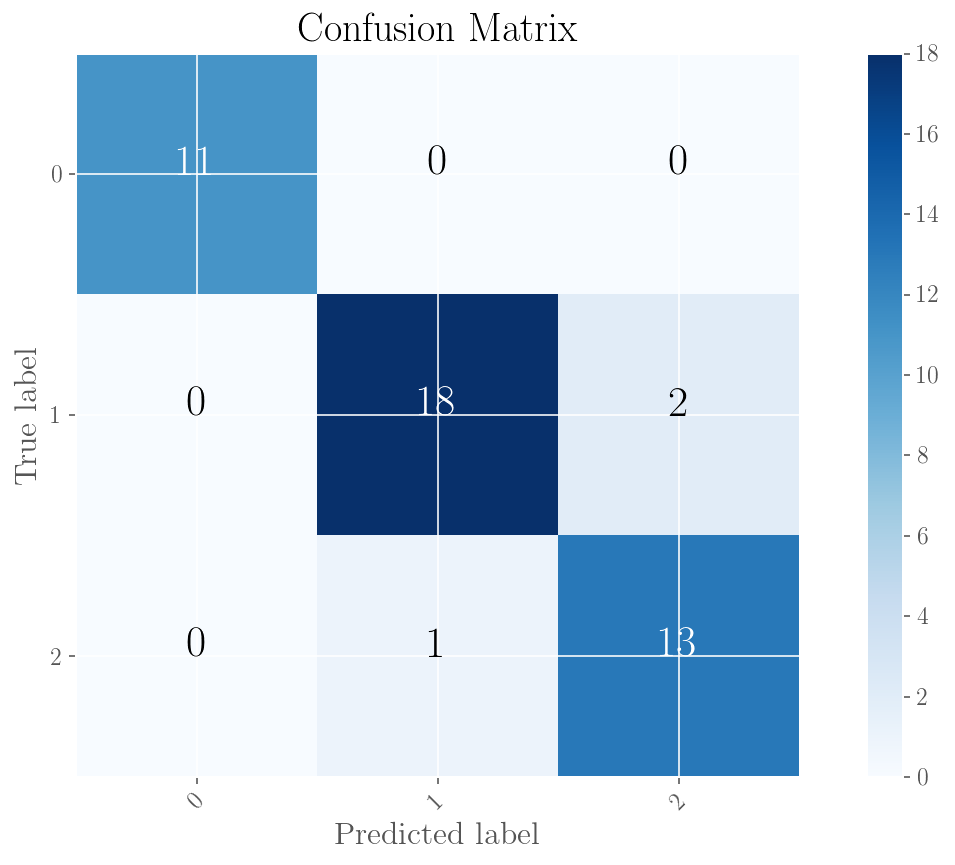

array([[11,  0,  0],
       [ 0, 18,  2],
       [ 0,  1, 13]])

In [2]:
# Load the Iris dataset from sklearn, separating the data matrix and the array of classes
iris = load_iris()
X = iris.data
y = iris.target

# Initiate the classifier (using default parameters)
rf = RandomForestClassifier()

# Splitting the dataset into train and test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fitting model on training set and predict on test set
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Plot the confusion matrix
do_plot_conf_mat(y_test, y_pred)

## Per-class performance metrics

In the generic case of a multi-class classification, the results in each of the classes can be assessed. For each class, we can compute the metrics described here. We will also show their values in the little Iris classification from above.

The binary classification case would just be a special case of this so we thought we'd stay general. In this general case, the categories of points illustrated above refer to the specific class we're monitoring, so while $TP$ is the diagonal value for class in the confusion matrix, $FP$ will be the total of false positives for it, that is, the sum of values in the column for class in matrix excluding the diagonal value. With the same reasoning, $FN$ will be the total of false negatives for the class, that is, the sum of values in the row for the class in the confusion matrix, excluding the diagonal value.

### Precision and specificity

The precision, referred to a class, is defined as (for the positive class):

$$
p = \frac{TP}{TP + FP} \ ,
$$

and is the fraction of true points in that class over the total of points classified as belonging to that class. It is also called the *positive predictive value*, basically the fraction of points that are correct for the class.
The precision is a measure of how *useful* the classified results are as it gives the fraction of relevant items to the total classified in class. With reference to the ellipse figure above, precision is the fraction of the $TP$ area in the ellipse to the whole ellipse area. A precision of $1$ means that all samples in class were correctly classified.

You can similarly compute the *negative predictive value* for the negative class.

### Recall

The *recall*, also called *sensitivity*, or *true positive rate*, is defined as

$$
r = \frac{TP}{TP + FN} \ ,
$$

and gives the fraction of true positives for the class over the total of points belonging to the class, meaning how many of them were detected. It is a measure of how *complete* the results are, meaning how many of the real points in class are retrieved. 

A recall $r=1$ means that all items in the class where actually classed as in class.

In the case of a binary classification, the equivalent of recall but for the negative class is called *specificity*, or *true negative rate*, and is defined as

$$
s = \frac{TN}{TN + FP} \ .
$$

### An example on precision vs. recall

This is taken from [[the Wikipedia page on precision and recall]](#1).

Let us imagine there is a surgeon who needs to remove all cancerous cells from a patient to prevent regeneration. In the process, if healthy cells are removed as well, this would leave disgraceful lesions to the organs involved. 
The decision to increase recall at the cost of precision is one where more cells than needed are removed and ensure that all bad ones will go. The decision to increase precision at the cost of recall, on the other hand, would see the surgeon be more conservative and ensure only bad cells are removed, at the cost of not removing them all.

### The $F$-score

While precision and recall measure different things, often related in such a way that increasing the one will decrease the other, the *F-score* is a single metric which brings both information together.

In general, a F-score is defined as 

$$
F_\beta = (1 + \beta^2)\frac{pr}{\beta^2p + r} \ \ \beta > 0, \beta \in \mathbb{R}
$$

The most commonly seen metric in this class is the *F1-score*, which is just the [harmonic mean](../../maths/measures.ipynb#The-harmonic-mean) of precision and recall:

$$
F_1 = 2 \frac{pr}{p + r}
$$

The general F-score furnishes a way to decide to weigh precision and recall differently: while the F1-score weighs them equally, the F2-score gives more weight to the precision and the F0.5-score does the reverse, for instance.

### In the case of our classifier above ...

Let's have a look at these per-class metrics for the classification problem we pursued above! We use the [`sklearn.metrics.classification_report`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) for the job, which is a convenient routine spitting out the three metrics we just described, for all classes, in one go. Note that for each metric it also furnishes the weighted value based on the support of the class, namely for the average precision, for instance,

$$
p_{avg} = \sum_c^C p_c s_c \ ,
$$

where the sum runs over all the classes, $p_c$ and $s_c$ are, respectively, the precision and the support of the class.

In [3]:
# sklearn furnishes a report of these metrics for all classes in one go!
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.95      0.90      0.92        20
          2       0.87      0.93      0.90        14

avg / total       0.94      0.93      0.93        45



## Global metrics

These metrics are meant to assess the performance of the classifier as a whole and not referring to each specific class. We already outlines the weighted average of precision, recall and F-score above, which serve exactly this purpose.

### Accuracy

The (global) *accuracy* of a classifier is defined as

$$
a = \frac{\sum_c^C TP_c}{N} \ ,
$$

and measures the total number of correct predictions over the total of data points ($N$ is the total of points and the sum runs over the classes, summing the counts of true positives in each). It would be the first thing which comes to mind (the simplest thing to do) when assessing a classifier's performance and indeed gives insight on how good it is to class points. But, its weak spot is that it gives no insight on the difference between the two types of errors: false positives and false negatives, treating them on the same ground. Plus it hides all information on which classes is doing better/worse.

In reality, the accuracy can also be computed per class. See the example we give below.

### In the case of our classifier above ...

In [8]:
# From sklearn
accuracy_score(y_test, y_pred)

0.93333333333333335

## A final example

Let us assume that we have a binary classifier, tested on $100$ samples for class $1$ and $200$ samples for class $0$ and whose performance reports these results:

* $TP = 80$;
* $FN = 20$;
* $FP = 5$;
* $TN = 195$

The accuracy gives $a = \frac{80 + 195}{80 + 20 + 5 + 195} = 0.91$, so quite high. But this masks the fact that actually class $1$ has a misclassification rate of $20/100$ (class $0$ has a misclassification rate of $5/200$, so quite small). In terms of accuracies per class (the complements of these missclassification rates), class $1$ has $a_1 = 0.8$ and class $0$ has $a_0 = 0.975$, so that the macro-average of the per-class accuracies is 

$$
a_p = \frac{1}{2} \left(0.8 + 0.975 \right) = 0.88
$$

## References

1. <a name="1"></a> [A nice detailed document on classification metrics from the University of Antwerp](http://www.clips.uantwerpen.be/~vincent/pdf/microaverage.pdf)
2. <a name="wiki"></a> [Wikipedia on precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Understanding and diagnosing your ML models - classification](http://gael-varoquaux.info/interpreting_ml_tuto/content/01_how_well/01_metrics.html#classification-settings), a tutorial-book by G Varofaux